In [1]:
# We need two packages for this problem
using DifferentialEquations    # This contains the algorithm to solve 
                               # numerically the differential equations
using Plots                    # To plot the results

In [4]:
# This function defines the system of ordinary differential equations to be solved
function f(dudt,u,p,t)
    r=[0.8; 0.25; 0.1]; a=[0.5; 20.0]; b=[0.2; 5.0]; g=[0.001; 0.0231]; k=100.0;  #These are parameters used in the model 
    dudt[1]=r[1]*u[1]*(1-u[1]/k)-a[1]*u[1]*u[2]/(u[1]+a[2])
    dudt[2]=r[2]*u[1]*u[2]/(u[1]+a[2])-b[1]*u[2]*u[3]/(u[2]+b[2])
    dudt[3]=r[3]*u[2]*u[3]/(u[2]+b[2])-g[1]*u[3]*exp(g[2]) 
end

f (generic function with 2 methods)

In [5]:
tspan=(0.0,12.0)                    # Specify the final time 
u0=[40.0; 12.0; 6.0]                # Initial values of the state variables
odep=ODEProblem(f,u0,tspan)         # the ODE problem is called "odep"
res = solve(odep,reltol=1.0e-8);    # Solves the problem 
#nothing                            # suppresses output from this cell

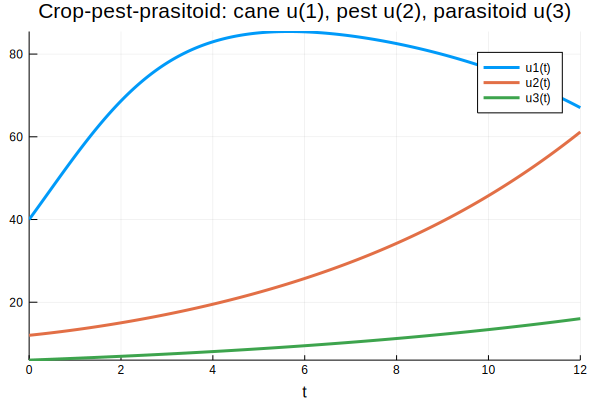

In [6]:
plot(res,title="Crop-pest-prasitoid: cane u(1), pest u(2), parasitoid u(3)")

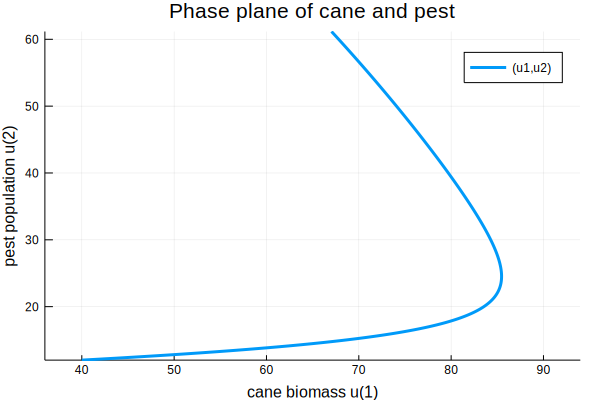

In [8]:
plot(res,vars=(1,2),xlabel="cane biomass u(1)",ylabel="pest population u(2)",title="Phase plane of cane and pest")

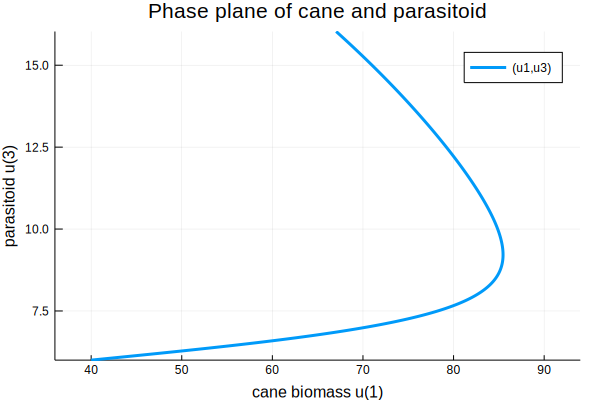

In [38]:
plot(res,vars=(1,3),xlabel="cane biomass u(1)",ylabel="parasitoid u(3)",title="Phase plane of cane and parasitoid")

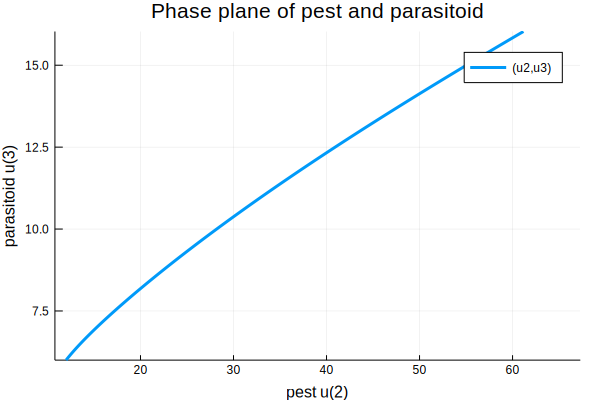

In [39]:
plot(res,vars=(2,3),xlabel="pest u(2)",ylabel="parasitoid u(3)",title="Phase plane of pest and parasitoid")

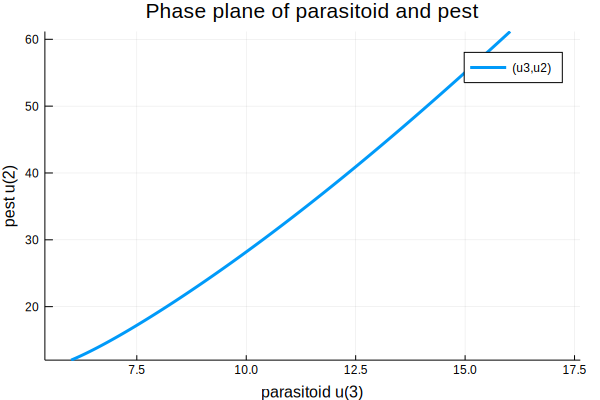

In [40]:
plot(res,vars=(3,2),ylabel="pest u(2)",xlabel="parasitoid u(3)",title="Phase plane of parasitoid and pest")

In [41]:
u12=res.u[end] # this is the value of u at t=12

3-element Array{Float64,1}:
 67.0437
 61.1673
 16.0292

In [42]:
biomass=u12[1]   # u's 1st, 2nd and 3rd elements are biomass, pest population, and parasitoid 

67.04373670706394

In [44]:
#profit compared with 0 parasitoid units: 
ProfitValue=10*(biomass-27)-30*u0[3]  # xinit[3] is the initial parasitoid units

220.43736707063943